<a href="https://colab.research.google.com/github/sidra3921/stock-price-forecasting-sidra2225165138/blob/main/Week4_Statistics_AppleStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📅 Week 4 – Statistics_AppleStockName: Sidra Project: Stock Price Forecasting (Apple Dataset) Course: Applied Data Science with AI

In [1]:
# Step 1: Install Kaggle API (agar already installed nahi hai)
!pip install kaggle

# Step 2: kaggle.json upload karo
from google.colab import files
files.upload()  # yahan tum kaggle.json select karogi

# Step 3: Kaggle credentials set karna
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Dataset download karna
!kaggle datasets download -d yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025

# Step 5: Unzip dataset
!unzip 10-year-daily-stock-data-of-apple-2015-to-2025.zip -d data/raw


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
License(s): apache-2.0
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 314MB/s]
Archive:  10-year-daily-stock-data-of-apple-2015-to-2025.zip
checkdir:  cannot create extraction directory: data/raw
           No such file or directory


In [3]:
!mkdir -p data/raw


In [4]:
!unzip 10-year-daily-stock-data-of-apple-2015-to-2025.zip -d data/raw


Archive:  10-year-daily-stock-data-of-apple-2015-to-2025.zip
  inflating: data/raw/apple_stock_10years_daywise.xlsx  


In [5]:
!ls data/raw


apple_stock_10years_daywise.xlsx


In [7]:
import pandas as pd

# Excel file load karna
df = pd.read_excel('/content/data/raw/apple_stock_10years_daywise.xlsx')

# Date ko datetime me convert karna
df['Date'] = pd.to_datetime(df['Date'])

# First few rows dekhna
df.head()



,Date,Close,High,Low,Open,Volume
0,2015-04-13,28.33,28.71,28.28,28.67,145460400
1,2015-04-14,28.21,28.43,28.12,28.36,102098400
2,2015-04-15,28.31,28.39,28.14,28.23,115881600
3,2015-04-16,28.18,28.38,28.16,28.20,113476000
4,2015-04-17,27.86,28.17,27.80,28.04,207828000


In [8]:
# Mean (average)
mean_values = df[['Open', 'High', 'Low', 'Close', 'Volume']].mean()
print("Mean values:\n", mean_values)

# Median
median_values = df[['Open', 'High', 'Low', 'Close', 'Volume']].median()
print("\nMedian values:\n", median_values)

# Mode
mode_values = df[['Open', 'High', 'Low', 'Close', 'Volume']].mode().iloc[0]
print("\nMode values:\n", mode_values)

# Variance
variance_values = df[['Open', 'High', 'Low', 'Close', 'Volume']].var()
print("\nVariance values:\n", variance_values)


Mean values:
 Open      9.953754e+01
High      1.006339e+02
Low       9.853229e+01
Close     9.963874e+01
Volume    1.125954e+08
dtype: float64

Median values:
 Open            75.68
High            76.88
Low             74.94
Close           75.70
Volume    96721700.00
dtype: float64

Mode values:
 Open            26.20
High            25.52
Low             21.82
Close           40.77
Volume    90956700.00
Name: 0, dtype: float64

Variance values:
 Open      4.638513e+03
High      4.741627e+03
Low       4.547201e+03
Close     4.650495e+03
Volume    4.294092e+15
dtype: float64


In [9]:
# Correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)

# Specific correlation with 'Close'
correlation_with_close = correlation_matrix['Close'].sort_values(ascending=False)
print("\nCorrelation with Close:\n", correlation_with_close)


            Open      High       Low     Close    Volume
Open    1.000000  0.999819  0.999840  0.999649 -0.533361
High    0.999819  1.000000  0.999760  0.999841 -0.529810
Low     0.999840  0.999760  1.000000  0.999829 -0.537113
Close   0.999649  0.999841  0.999829  1.000000 -0.533627
Volume -0.533361 -0.529810 -0.537113 -0.533627  1.000000

Correlation with Close:
 Close     1.000000
High      0.999841
Low       0.999829
Open      0.999649
Volume   -0.533627
Name: Close, dtype: float64


📊 Week 4 Report: Statistics & Correlation Analysis
🎯 Target Variable: Close
🔍 Correlation Results:
Feature	Correlation with Close	Relationship Type
High	0.999841	Strong Positive
Low	0.999829	Strong Positive
Open	0.999649	Strong Positive
Volume	-0.533627	Moderate Negative
🧠 Top 3 Most Related Features with Close:

High (r = 0.999841)
➤ When Apple’s highest price of the day increases, the closing price also tends to increase.

Low (r = 0.999829)
➤ The lowest price of the day moves closely with the closing price, showing consistent market trends.

Open (r = 0.999649)
➤ Stocks that open higher tend to close higher as well, suggesting a stable positive movement during trading hours.

📉 Less Related Feature:

Volume (r = -0.5336)
➤ The negative correlation suggests that higher trading volume doesn’t necessarily mean a higher closing price — it might indicate volatility instead of growth.

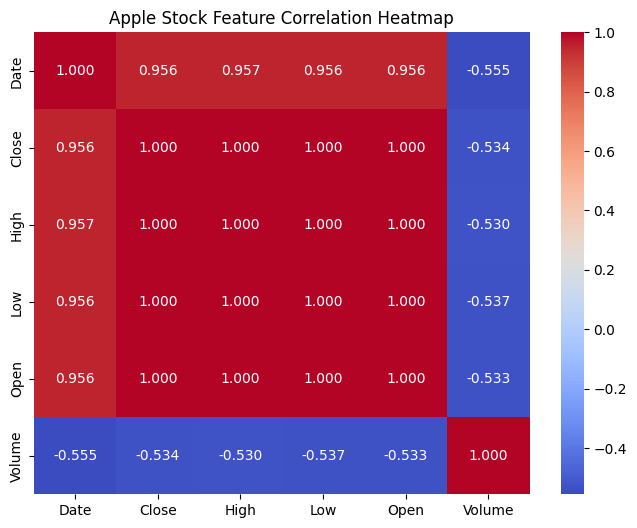

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Apple Stock Feature Correlation Heatmap')
plt.show()


Insight from Heatmap:

The heatmap visually confirms that all price-related variables move together, while Volume behaves differently — this can help filter key features for predictive modeling.